In [2]:
import torch
import numpy as np
import pickle
from transformers import AutoTokenizer

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import re
from setuptools.namespaces import flatten
from urllib.parse import urlparse, unquote_plus

In [4]:
MODEL_PATH = "../inference/service/models"
TOKENIZER_NAME = "bert-base-multilingual-uncased"

In [5]:
model = torch.load(MODEL_PATH + "/model_finetuned.h5", map_location='cpu')

In [6]:
with open(MODEL_PATH + '/mlb.pickle', 'rb') as handle:
    mlb = pickle.load(handle)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultiLabelBinarizer from version 1.0.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
def preprocess_url(url):
    ## convert to urlparse with quoted
    url_parsed = urlparse(unquote_plus(url))
    ## join all url attributes
    url_text = ''.join(x for x in [url_parsed.netloc, url_parsed.path, url_parsed.params, url_parsed.query])
    
    ## split url to tokens ie: words
    tokens = re.split('[- _ % : , / \. \+ = ]', url_text)
    ## spliting by upper case
    
    tokens = list(flatten([re.split(r'(?<![A-Z\W])(?=[A-Z])', s) for s in tokens]))
    ## delete token with digits with len < 2
    tokens = [token for token in tokens if (not any(c.isdigit() for c in token)) and (not len(token) <=2)]
    tokens = [token for token in tokens if token not in ['www', 'html', 'com', 'net', 'org']]
    return ' '.join(token for token in tokens)

In [8]:
# urls_cleaned = [preprocess_url(url) for url in URLs]
# urls_cleaned

In [9]:
tokenizer = AutoTokenizer.from_pretrained(
    TOKENIZER_NAME, map_location=torch.device("cpu")
)

In [1]:
# # import torch
# # from utils import *


# URLs = [
#     "https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html"
# ]

# urls_cleaned = [preprocess_url(url) for url in URLs]

# from transformers import AutoTokenizer


# inputs = tokenizer(
#     urls_cleaned,
#     truncation=True,
#     add_special_tokens=True,
#     max_length=40,
#     return_token_type_ids=False,
#     padding="max_length",
#     return_attention_mask=True,
#     return_tensors="pt",
# )

# # model.eval()
# out = model(inputs["input_ids"], attention_mask=inputs["attention_mask"])

# pred_probs = torch.sigmoid(out).detach().numpy()
# pred_bools = np.where(pred_probs > 0.5, 1, 0)
# print(mlb.inverse_transform(pred_bools))

In [10]:
urls = [
    "https://www.ladepeche.fr/2019/12/17/cyril-hanouna-en-couple-avec-laeticia-hallyday-il-repond-dans-tpmp,8610297.php",
    "https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4",
]
cleaned_urls = [preprocess_url(url) for url in urls]
print(cleaned_urls)
inputs = tokenizer(
    cleaned_urls,
    truncation=True,
    add_special_tokens=True,
    max_length=40,
    return_token_type_ids=False,
    padding="max_length",
    return_attention_mask=True,
    return_tensors="pt",
)

out = model(inputs["input_ids"], attention_mask=inputs["attention_mask"])

pred_probs = torch.sigmoid(out).detach().numpy()

pred_bools = np.where(pred_probs > 0.5, 1, 0)

{"urls": urls, "predictions": mlb.inverse_transform(pred_bools)}

['ladepeche cyril hanouna couple avec laeticia hallyday repond dans tpmp php', 'orange webmail continue htmljsessionid']


{'urls': ['https://www.ladepeche.fr/2019/12/17/cyril-hanouna-en-couple-avec-laeticia-hallyday-il-repond-dans-tpmp,8610297.php',
  'https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4'],
 'predictions': [('184',), ('104', '384', '394')]}

In [11]:
import torch.onnx

In [12]:
torch_out = model(**inputs)
out == torch_out

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, T

In [13]:
input_ids = inputs['input_ids']
input_mask = inputs['attention_mask']

with torch.no_grad():
    torch_out = model(**inputs)

torch.onnx.export(model,
                  (input_ids, input_mask),
                  "model.onnx",
                  input_names=['input_ids', 'attention_mask'],
                  output_names=['output'],
                  dynamic_axes={
                      "input_ids": {0: "batch_size"},
                      "input_mask": {0: "batch_size"},
                      "output": {0: "output"}
                  },
                  opset_version=11,
                  )

In [14]:
# !pip install onnx

In [13]:
import onnx

onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)

In [14]:
import time

In [15]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("model.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {
    ort_session.get_inputs()[0].name: to_numpy(inputs["input_ids"]),
    ort_session.get_inputs()[1].name: to_numpy(inputs["attention_mask"]),
}
ort_outs = ort_session.run(None, ort_inputs)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

# print("Exported model has been tested with ONNXRuntime, and the result looks good!")

In [16]:
# ort_outs

In [17]:
pred_probs = torch.sigmoid(torch.Tensor(ort_outs[0]))
pred_probs
pred_bools = np.where(pred_probs > 0.5, 1, 0)
pred_bools
{"urls": urls, "predictions": mlb.inverse_transform(pred_bools)}

{'urls': ['https://www.ladepeche.fr/2019/12/17/cyril-hanouna-en-couple-avec-laeticia-hallyday-il-repond-dans-tpmp,8610297.php',
  'https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4'],
 'predictions': [('184',), ('104', '384', '394')]}

In [2]:
import os
import pickle

path = 'models_trained/'
models_scoring = {}
for model_dir in os.listdir(path):
    with open(path + model_dir + '/model_scoring.pickle', 'rb') as handle:
        models_scoring[model_dir] = pickle.load(handle)[1]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
list_models = models_scoring.keys()

In [4]:
import pandas as pd

pd.DataFrame.from_dict(models_scoring).T

,Accuracy,Hamming loss,AUC,F1 score macro,F1 score micro,F1 score weighted
bertm_5epochs_dropout,0.073055,0.009498,0.611556,0.244681,0.510260,0.406705
bertm_5epochs_dropout_concat,0.187065,0.008338,0.741633,0.528397,0.638434,0.608079
bertm_5epochs_dropout_freezing_concat,0.025142,0.011390,0.537301,0.093941,0.268745,0.197125
bertm_5epochs_nodropout,0.077008,0.009460,0.613980,0.250530,0.515028,0.411921
camembert_5epochs_nodropout,0.047755,0.010287,0.566295,0.134595,0.438133,0.308513
flaubert_5epochs_nodropout,0.000158,0.012761,0.501113,0.003392,0.011651,0.008895


In [6]:
MODEL_PATH = "models_trained/camembert_5epochs_nodropout/"
with open(MODEL_PATH + 'model_scoring.pickle', 'rb') as handle:
    camembert_scoring = pickle.load(handle)

In [7]:
MODEL_PATH = "models_trained/bertm_5epochs_dropout_concat/"
with open(MODEL_PATH + 'model_scoring.pickle', 'rb') as handle:
    bertm_scoring = pickle.load(handle)

In [14]:
model_history = pd.DataFrame.from_dict(bertm_scoring[0])
model_history

,epoch,Training Loss,Valid. Loss,Accuracy,Hamming loss,AUC,F1 score macro,F1 score micro,F1 score weighted
0,1,0.000038,0.030879,0.081789,0.009589,0.620673,0.263846,0.516877,0.413826
1,2,0.000020,0.026968,0.135904,0.008887,0.691126,0.418586,0.595395,0.530535
2,3,0.000017,0.025524,0.159185,0.008435,0.713323,0.478819,0.615158,0.570034
3,4,0.000016,0.024917,0.175349,0.008241,0.722537,0.502466,0.631775,0.591850
4,5,0.000015,0.025002,0.188966,0.008305,0.745129,0.534929,0.641245,0.612088


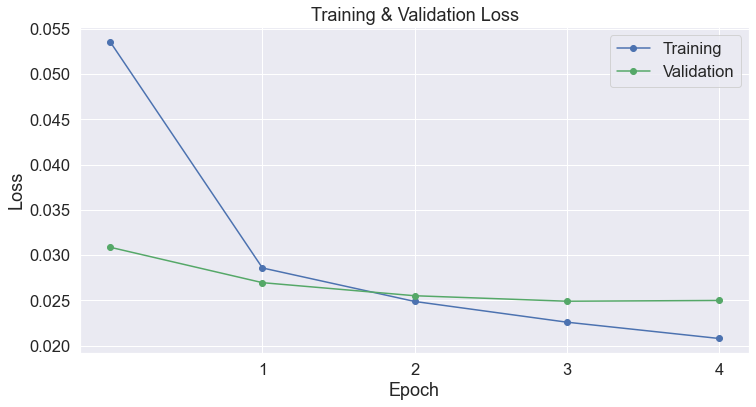

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(model_history['Training Loss'] * 1423, 'b-o', label="Training")
plt.plot(model_history['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()